In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import json
import gzip

In [2]:
def parse(path):
    g=gzip.open(path,'rb')
    for l in g:
        yield eval(l)
def getDF(path):
    i=0
    df1={}
    for d in parse(path):
        df1[i]=d
        i+=1
    return pd.DataFrame.from_dict(df1,orient='index')
df1=getDF("D:/reviews_Musical_Instruments_5.json.gz")

In [3]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g :
        yield eval(l)
        
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient = "index")

df2 = getDF("D:/meta_Musical_Instruments.json.gz")

In [4]:
df = pd.merge(df1,df2,on = "asin")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012","[Musical Instruments, Live Sound & Stage, Stag...",...,[Heavy-Duty Injection Molded Connector Specia...,"[>#100,614 in Musical Instruments (See Top 100...",[],Musical Instruments,,"April 13, 2004",,[],[],{}
1,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012","[Musical Instruments, Live Sound & Stage, Stag...",...,[Heavy-Duty Injection Molded Connector Specia...,"[>#100,614 in Musical Instruments (See Top 100...",[],Musical Instruments,,"April 13, 2004",,[],[],{}
2,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014","[Musical Instruments, Live Sound & Stage, Stag...",...,[Heavy-Duty Injection Molded Connector Specia...,"[>#100,614 in Musical Instruments (See Top 100...",[],Musical Instruments,,"April 13, 2004",,[],[],{}
3,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014","[Musical Instruments, Live Sound & Stage, Stag...",...,[Heavy-Duty Injection Molded Connector Specia...,"[>#100,614 in Musical Instruments (See Top 100...",[],Musical Instruments,,"April 13, 2004",,[],[],{}
4,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012","[Musical Instruments, Live Sound & Stage, Stag...",...,[Heavy-Duty Injection Molded Connector Specia...,"[>#100,614 in Musical Instruments (See Top 100...",[],Musical Instruments,,"April 13, 2004",,[],[],{}


In [5]:
df.to_csv("name")

In [6]:
df = df.drop(["reviewerName","unixReviewTime","tech1","fit","also_buy","tech2","feature","also_view","main_cat","date","imageURLHighRes","details"], axis = 1)

#### hear sentiment is rating of 5,4 are positive.3 is neutral and 3,2 are negative.

In [7]:

df=df.rename(columns={"asin":"productID","overall":"rating","unixReviewTime":"unixTime"})
df.head()

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,category,description,title,brand,rank,similar_item,price,imageURL
0,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,"12 21, 2012","[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[]
1,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,"12 21, 2012","[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[]
2,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,"01 19, 2014","[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[]
3,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,"01 19, 2014","[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[]
4,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,"11 16, 2012","[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[]


#### There is no null values present in the dataset

In [8]:
df["reviewTime"]=pd.to_datetime(df["reviewTime"])


In [9]:
df["sentiment"]=df['rating']
df["sentiment"]=df["sentiment"].replace({1:"extreme_negative",2:"negative",3:"neutral",4:"positive",5:"extreme_positive"})
df.head(20)

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,category,description,title,brand,rank,similar_item,price,imageURL,sentiment
0,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,2012-12-21,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
1,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,2012-12-21,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
2,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,2014-01-19,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
3,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,2014-01-19,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
4,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,2012-11-16,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],neutral
5,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,2012-11-16,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],neutral
6,A3M1PLEYNDEYO8,B00004Y2UT,"[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,2008-07-06,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
7,A3M1PLEYNDEYO8,B00004Y2UT,"[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,2008-07-06,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
8,AMNTZU1YQN1TH,B00004Y2UT,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,2014-01-08,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
9,AMNTZU1YQN1TH,B00004Y2UT,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,2014-01-08,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive


In [10]:
df.isnull().sum()

reviewerID      0
productID       0
helpful         0
reviewText      0
rating          0
summary         0
reviewTime      0
category        0
description     0
title           0
brand           0
rank            0
similar_item    0
price           0
imageURL        0
sentiment       0
dtype: int64

In [11]:
df.shape

(9391, 16)

In [12]:
df.columns

Index(['reviewerID', 'productID', 'helpful', 'reviewText', 'rating', 'summary',
       'reviewTime', 'category', 'description', 'title', 'brand', 'rank',
       'similar_item', 'price', 'imageURL', 'sentiment'],
      dtype='object')

In [13]:
df.dtypes

reviewerID              object
productID               object
helpful                 object
reviewText              object
rating                 float64
summary                 object
reviewTime      datetime64[ns]
category                object
description             object
title                   object
brand                   object
rank                    object
similar_item            object
price                   object
imageURL                object
sentiment               object
dtype: object

In [14]:
df.isnull().sum()

reviewerID      0
productID       0
helpful         0
reviewText      0
rating          0
summary         0
reviewTime      0
category        0
description     0
title           0
brand           0
rank            0
similar_item    0
price           0
imageURL        0
sentiment       0
dtype: int64

In [15]:
df.describe()

,rating
count,9391.000000
mean,4.486317
std,0.892281
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [16]:
df.head(20)

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,category,description,title,brand,rank,similar_item,price,imageURL,sentiment
0,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,2012-12-21,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
1,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,2012-12-21,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
2,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,2014-01-19,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
3,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,2014-01-19,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
4,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,2012-11-16,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],neutral
5,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,2012-11-16,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],neutral
6,A3M1PLEYNDEYO8,B00004Y2UT,"[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,2008-07-06,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
7,A3M1PLEYNDEYO8,B00004Y2UT,"[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,2008-07-06,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
8,AMNTZU1YQN1TH,B00004Y2UT,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,2014-01-08,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive
9,AMNTZU1YQN1TH,B00004Y2UT,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,2014-01-08,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive


## Data visualization

In [17]:
import warnings
warnings.filterwarnings('ignore')

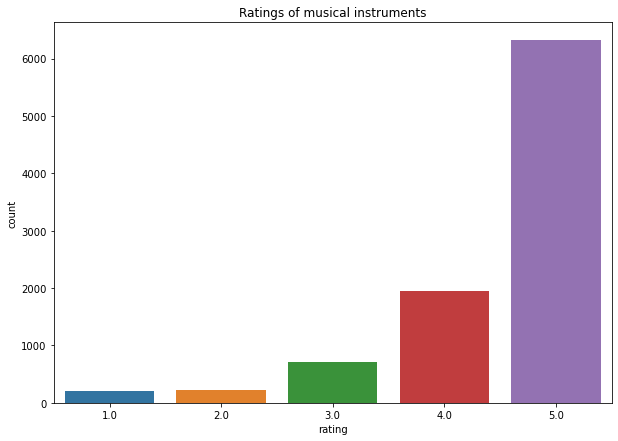

In [18]:
plt.figure(figsize=(10,7))
sb.countplot(df['rating'])
plt.title('Ratings of musical instruments')
plt.xlabel('rating')
plt.show()

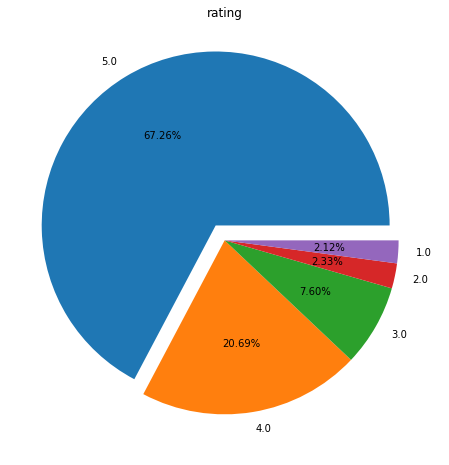

In [19]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title("rating")
percentage = df['rating'].value_counts()
labels = list(df['rating'].value_counts().index)
plt.pie(percentage, labels = labels, autopct = '%0.2f%%', explode = (0.1,0,0,0,0))
plt.show()

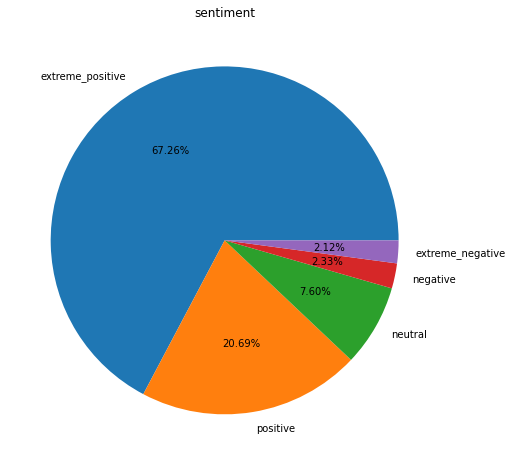

In [20]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title("sentiment")
percentage = df['sentiment'].value_counts()
labels = list(df['sentiment'].value_counts().index)
plt.pie(percentage, labels = labels, autopct = '%0.2f%%')
plt.show()

In [21]:
df["reviewyear"]=df['reviewTime'].dt.year
df.head()

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,category,description,title,brand,rank,similar_item,price,imageURL,sentiment,reviewyear
0,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,2012-12-21,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive,2012
1,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,2012-12-21,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive,2012
2,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,2014-01-19,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive,2014
3,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,2014-01-19,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive,2014
4,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,2012-11-16,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],neutral,2012


In [22]:
df.to_csv("music")

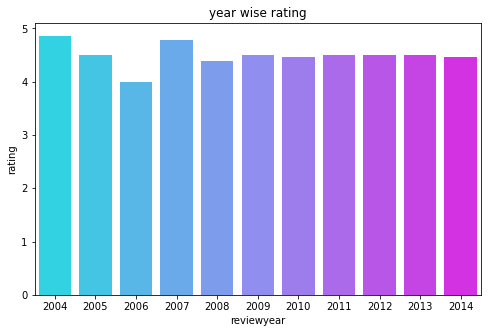

In [23]:
plt.figure(figsize = (8,5))
sb.barplot(data = df, x = 'reviewyear', y = 'rating', palette = 'cool', ci = False)
plt.title("year wise rating")
plt.show()

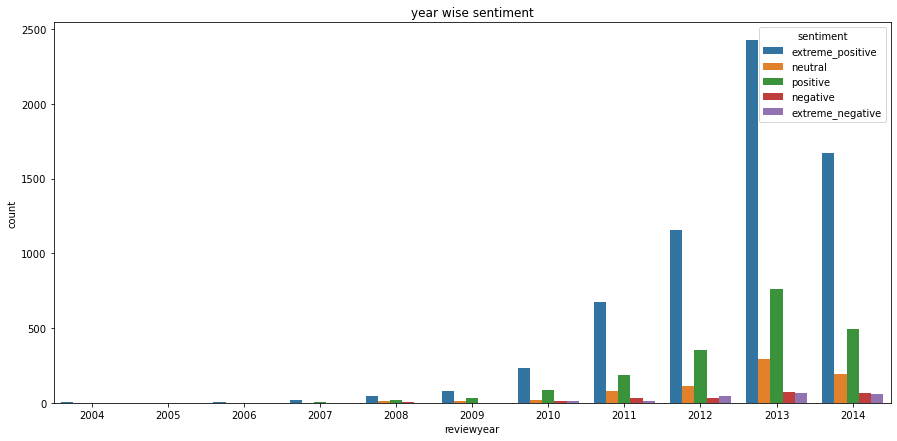

In [24]:
plt.figure(figsize=(15,7))
sb.countplot(df['reviewyear'],hue=df['sentiment'])
plt.title('year wise sentiment')
plt.show()

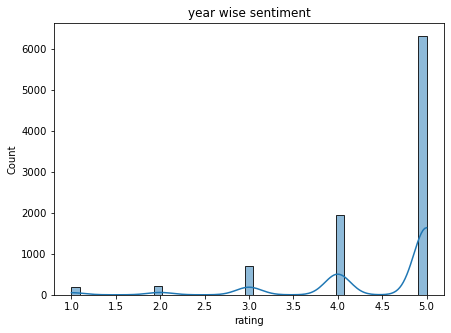

In [25]:
plt.figure(figsize=(7,5))
sb.histplot(df['rating'],kde=True)
plt.title('year wise sentiment')
plt.show()

In [26]:
df.to_csv("musical_instruments")

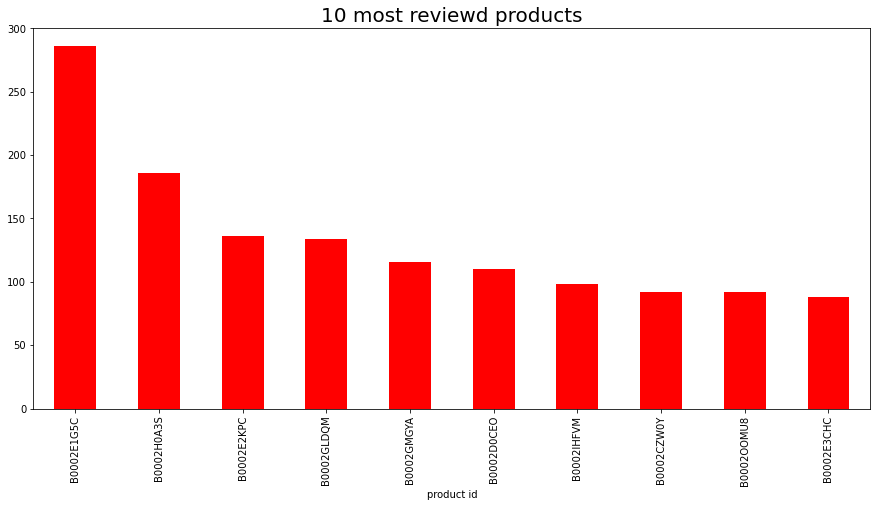

In [27]:
df['productID'].value_counts()[:10].plot.bar(figsize=(15,7),color='red')
plt.title("10 most reviewd products",fontsize=20)
plt.xlabel('product id')
plt.show()

In [28]:
import re

def clean_text(text):
    text=re.sub("[^0-9A-Za-z\-]+"," ",text)#remoce special characters
    text=re.sub("(?<!\w)\d+","",text)  #if number is written after a word remove it
    text=re.sub("-(?!\w)","",text)  #remove hyphen except for words which need hyphen tik-tok 
    text=" ".join(text.split())
    text=text.lower()
    return text

In [29]:
df['reviewText']=df['reviewText'].apply(clean_text)
df['reviewText'][2]

'i have used monster cables for years and with good reason the lifetime warranty is worth the price alone simple fact cables break but getting to replace them at no cost is where it s at'

In [30]:
df['rating'].value_counts()

5.0    6316
4.0    1943
3.0     714
2.0     219
1.0     199
Name: rating, dtype: int64

In [31]:
df['sentiment'].value_counts()

extreme_positive    6316
positive            1943
neutral              714
negative             219
extreme_negative     199
Name: sentiment, dtype: int64

In [32]:
df['reviewyear'].value_counts()

2013    3618
2014    2483
2012    1699
2011     978
2010     363
2009     126
2008      78
2007      23
2006      12
2004       7
2005       4
Name: reviewyear, dtype: int64

In [33]:
df.groupby(['reviewyear','sentiment']).size()

reviewyear  sentiment       
2004        extreme_positive       6
            positive               1
2005        extreme_positive       2
            positive               2
2006        extreme_negative       2
            extreme_positive       7
            neutral                1
            positive               2
2007        extreme_positive      18
            positive               5
2008        extreme_positive      45
            negative               3
            neutral                9
            positive              21
2009        extreme_negative       2
            extreme_positive      81
            negative               2
            neutral                9
            positive              32
2010        extreme_negative      10
            extreme_positive     236
            negative               9
            neutral               20
            positive              88
2011        extreme_negative      12
            extreme_positive     672
         

In [34]:
df['productID'].unique()

array(['B00004Y2UT', 'B00005ML71', 'B000068NSX', 'B000068NTU',
       'B000068NZG', 'B000068O3X', 'B000068O59', 'B00009W40D',
       'B00009W40G', 'B0000AQRSR', 'B0000AQRSS', 'B0000AQRST',
       'B0000AQRSU', 'B000165DSM', 'B0001FTVD6', 'B0002BACB4',
       'B0002CZR3G', 'B0002CZSJO', 'B0002CZST4', 'B0002CZT0M',
       'B0002CZTIO', 'B0002CZUTM', 'B0002CZUUG', 'B0002CZV46',
       'B0002CZV78', 'B0002CZV82', 'B0002CZVA0', 'B0002CZVHI',
       'B0002CZVI2', 'B0002CZVK0', 'B0002CZVW8', 'B0002CZVWS',
       'B0002CZVZK', 'B0002CZW0Y', 'B0002CZZW4', 'B0002D0096',
       'B0002D01IG', 'B0002D01K4', 'B0002D01KO', 'B0002D01PY',
       'B0002D02IU', 'B0002D02RQ', 'B0002D05FU', 'B0002D0B4K',
       'B0002D0CA8', 'B0002D0CEO', 'B0002D0CGM', 'B0002D0CGW',
       'B0002D0CKI', 'B0002D0CL2', 'B0002D0CLC', 'B0002D0CNA',
       'B0002D0COE', 'B0002D0CQC', 'B0002D0DWK', 'B0002D0HY4',
       'B0002D0JZ6', 'B0002D0LKY', 'B0002D0LM2', 'B0002D0MFI',
       'B0002D0N70', 'B0002D0Q2W', 'B0002DUPZU', 'B0002

In [35]:
product_rating={}
for row,product in enumerate(df['productID'].unique()):
    product_temp=df[df["productID"]==product]
    product_rating[product]=product_temp['rating'].mean()

In [36]:
df_product_rating=pd.DataFrame(list(product_rating.items()),columns=['productId',"rating"])
df_product_rating.head()

,productId,rating
0,B00004Y2UT,4.666667
1,B00005ML71,3.800000
2,B000068NSX,4.571429
3,B000068NTU,4.800000
4,B000068NZG,4.600000


In [37]:
df_product_rating[df_product_rating['rating']==df_product_rating['rating'].min()]

,productId,rating
459,B0025V1REU,2.714286


#### 2.71(the sentiment is negative) is the minimum rating and productid is B0025V1REU

In [38]:
d=df[df['productID']=='B0025V1REU']
d

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,category,description,title,brand,rank,similar_item,price,imageURL,sentiment,reviewyear
7875,A3HCK3UXD6WS4G,B0025V1REU,"[0, 0]",this processor is okay for home practice if yo...,3.0,okay,2014-03-11,"[Musical Instruments, Amplifiers & Effects, Gu...","[Small package, big punch. Introducing the all...",DigiTech RP55 Guitar Multi-Effects Processor,DigiTech,"[>#1,853 in Musical Instruments (See Top 100 i...","class=""a-bordered a-horizontal-stripes a-spa...",$7.99,[https://images-na.ssl-images-amazon.com/image...,neutral,2014
7876,A2W8OGJDV7TCMT,B0025V1REU,"[0, 0]",this little unit is packed with great effects ...,4.0,Just keeps getting better...,2014-01-23,"[Musical Instruments, Amplifiers & Effects, Gu...","[Small package, big punch. Introducing the all...",DigiTech RP55 Guitar Multi-Effects Processor,DigiTech,"[>#1,853 in Musical Instruments (See Top 100 i...","class=""a-bordered a-horizontal-stripes a-spa...",$7.99,[https://images-na.ssl-images-amazon.com/image...,positive,2014
7877,A2T8TWZAWLQWBV,B0025V1REU,"[0, 1]",i like the drum machine and the tuner but i do...,3.0,It's OK,2014-02-26,"[Musical Instruments, Amplifiers & Effects, Gu...","[Small package, big punch. Introducing the all...",DigiTech RP55 Guitar Multi-Effects Processor,DigiTech,"[>#1,853 in Musical Instruments (See Top 100 i...","class=""a-bordered a-horizontal-stripes a-spa...",$7.99,[https://images-na.ssl-images-amazon.com/image...,neutral,2014
7878,A3KBFCPNQ58YK4,B0025V1REU,"[0, 1]",these types of pedals are toys they are a chea...,1.0,A Toy,2014-02-21,"[Musical Instruments, Amplifiers & Effects, Gu...","[Small package, big punch. Introducing the all...",DigiTech RP55 Guitar Multi-Effects Processor,DigiTech,"[>#1,853 in Musical Instruments (See Top 100 i...","class=""a-bordered a-horizontal-stripes a-spa...",$7.99,[https://images-na.ssl-images-amazon.com/image...,extreme_negative,2014
7879,AK7X7IXX7WYNJ,B0025V1REU,"[1, 1]",works well and has good sound i really enjoy a...,5.0,cool,2014-01-20,"[Musical Instruments, Amplifiers & Effects, Gu...","[Small package, big punch. Introducing the all...",DigiTech RP55 Guitar Multi-Effects Processor,DigiTech,"[>#1,853 in Musical Instruments (See Top 100 i...","class=""a-bordered a-horizontal-stripes a-spa...",$7.99,[https://images-na.ssl-images-amazon.com/image...,extreme_positive,2014
7880,AA8SWH4Y5SN8H,B0025V1REU,"[0, 1]",i had a friend with one of these and he loves ...,1.0,Oh god,2012-12-28,"[Musical Instruments, Amplifiers & Effects, Gu...","[Small package, big punch. Introducing the all...",DigiTech RP55 Guitar Multi-Effects Processor,DigiTech,"[>#1,853 in Musical Instruments (See Top 100 i...","class=""a-bordered a-horizontal-stripes a-spa...",$7.99,[https://images-na.ssl-images-amazon.com/image...,extreme_negative,2012
7881,A2IROAVGAK1G0S,B0025V1REU,"[1, 2]",this particular brand i ve seen around and hav...,2.0,Dead Digi,2012-11-20,"[Musical Instruments, Amplifiers & Effects, Gu...","[Small package, big punch. Introducing the all...",DigiTech RP55 Guitar Multi-Effects Processor,DigiTech,"[>#1,853 in Musical Instruments (See Top 100 i...","class=""a-bordered a-horizontal-stripes a-spa...",$7.99,[https://images-na.ssl-images-amazon.com/image...,negative,2012


In [39]:
d['reviewText'].iloc[3]

'these types of pedals are toys they are a cheap way for a beginner to have effects to play with by all means if you are buying it for your kid who just started playing if not i recommend slowly building your pedal collection and use the money to get decent pedal whether it is a delay or distortion'

In [40]:
d['reviewText'].iloc[5]

'i had a friend with one of these and he loves it i got one on his recommendation and when i put the batteries in it it started smoking it did work for awhile i pulled the batteries out and tried to ac adapter and it smoked again this time it did not work i am one of those people who gives an item one try and if it does not work holds a grudge i would not advise anybody to get this'

In [41]:
d['reviewText'].iloc[6]

'this particular brand i ve seen around and haven t heard to much about them but the one that i got worked fine for about a couple days it went out and i sent it in hoping to rule out the possibility that i might have gotten a bad one and i requested in a letter when i sent it in that they send another one in exchange that didn t work out so well with that being the only way i could rate it and never receiving a replacement to verify that i just got a bad one i d have to rate this one at the bottom'

###### yes,these are reyally dissapointed

In [42]:
df['reviewText'].iloc[:5]

0    so good that i bought another one love the hea...
1    so good that i bought another one love the hea...
2    i have used monster cables for years and with ...
3    i have used monster cables for years and with ...
4    i now use this cable to run from the output of...
Name: reviewText, dtype: object

In [43]:
len(df['reviewText'])

9391

In [44]:
#!pip install textblob

In [45]:
from textblob import TextBlob

In [46]:
blob=TextBlob(df['reviewText'][1])
blob.sentiment

Sentiment(polarity=0.31666666666666665, subjectivity=0.5851851851851853)

In [47]:
polarity_list,subjectivity_list=[],[]
for i in range(len(df['reviewText'])):
    blob=TextBlob(df['reviewText'][i])
    polarity_list.append(blob.sentiment.polarity)
    subjectivity_list.append(blob.sentiment.subjectivity)

In [48]:
print(polarity_list[:5])
print(subjectivity_list[:5])

[0.31666666666666665, 0.31666666666666665, 0.3333333333333333, 0.3333333333333333, 0.006540404040404044]
[0.5851851851851853, 0.5851851851851853, 0.3523809523809524, 0.3523809523809524, 0.3160606060606061]


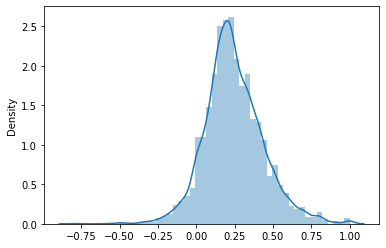

In [49]:
sb.distplot(polarity_list)
plt.show()

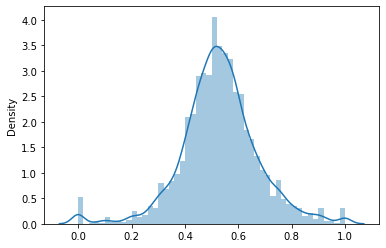

In [50]:
sb.distplot(subjectivity_list)
plt.show()

In [51]:
from scipy import stats
stats.describe(polarity_list)

DescribeResult(nobs=9391, minmax=(-0.8, 1.0), mean=0.24569940967673506, variance=0.03660467255202879, skewness=0.34558841494694154, kurtosis=1.3188949866555957)

In [52]:
stats.describe(subjectivity_list)

DescribeResult(nobs=9391, minmax=(0.0, 1.0), mean=0.529392795546359, variance=0.02114021261323138, skewness=-0.17254915862903472, kurtosis=1.9814492892475997)

##### highly positive reviews

In [53]:
c=0
for i in range(len(polarity_list)):
    if(c>10):break
    if(polarity_list[i]>.9 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

i use this for video exchanges on a guitar instruction website it s perfect for vocals podcasting video recording and so forth shure makes excellent stuff what s also great is you save some money as an xlr cable is included i m very happy with this purchase 

i use this for video exchanges on a guitar instruction website it s perfect for vocals podcasting video recording and so forth shure makes excellent stuff what s also great is you save some money as an xlr cable is included i m very happy with this purchase 

the grip is excellent but i prefer the sharps over these these are sturdy and look like i won t be needing another set for quite some time 

the grip is excellent but i prefer the sharps over these these are sturdy and look like i won t be needing another set for quite some time 

best tool ever 

best tool ever 

excellent 

excellent 

does what it should and yamaha quality the price seems very good for what you get out of this pedal i am using on a yamaha board 

does what

##### highly negative reviws

In [54]:
c=0
for i in range(len(polarity_list)):
    if(c>10):break
    if(polarity_list[i]<.9 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

so good that i bought another one love the heavy cord and gold connectors bass sounds great i just learned last night how to coil them up i guess i should read instructions more carefully but no harm done still works great 

so good that i bought another one love the heavy cord and gold connectors bass sounds great i just learned last night how to coil them up i guess i should read instructions more carefully but no harm done still works great 

i have used monster cables for years and with good reason the lifetime warranty is worth the price alone simple fact cables break but getting to replace them at no cost is where it s at 

i have used monster cables for years and with good reason the lifetime warranty is worth the price alone simple fact cables break but getting to replace them at no cost is where it s at 

i now use this cable to run from the output of my pedal chain to the input of my fender amp after i bought monster cable to hook up my pedal board i thought i would try anoth

##### objective revies

In [55]:
c=0
for i in range(len(subjectivity_list)):
    if(c>10):break
    if(subjectivity_list[i]>.9 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

there s nothing complicated about this purchase it s a cable it works it doesn t cost a lot it s a great deal get it i use it every week and it still sounds perfect then again i never mistreat my equipment 

there s nothing complicated about this purchase it s a cable it works it doesn t cost a lot it s a great deal get it i use it every week and it still sounds perfect then again i never mistreat my equipment 

i use this for video exchanges on a guitar instruction website it s perfect for vocals podcasting video recording and so forth shure makes excellent stuff what s also great is you save some money as an xlr cable is included i m very happy with this purchase 

i use this for video exchanges on a guitar instruction website it s perfect for vocals podcasting video recording and so forth shure makes excellent stuff what s also great is you save some money as an xlr cable is included i m very happy with this purchase 

hello i bought a epiphone goth studio guitar and i also bought t

##### subjective reviews

In [56]:
c=0
for i in range(len(subjectivity_list)):
    if(c>10):break
    if(subjectivity_list[i]<.1 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

i bought this to use in my home studio to control my midi keyboard it does just what i wanted it to do 

i bought this to use in my home studio to control my midi keyboard it does just what i wanted it to do 

received it in time standard blister packaging but the cable stopped working after days since i was out of days return time sent an email to the manufacturer but no response till today 

received it in time standard blister packaging but the cable stopped working after days since i was out of days return time sent an email to the manufacturer but no response till today 

they are screws they screw in and hold things to say that they did less would ve gotten the star i like them 

they are screws they screw in and hold things to say that they did less would ve gotten the star i like them 

after buying this product i have concluded that is a lot of money for foam does the job but i think the velcro job would be preferable to this one 

after buying this product i have concluded th

##### neutral reviews

In [57]:
c=0
for i in range(len(polarity_list)):
    if(c>10):break
    if(polarity_list[i]==0 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

i bought this to use in my home studio to control my midi keyboard it does just what i wanted it to do 

i bought this to use in my home studio to control my midi keyboard it does just what i wanted it to do 

received it in time standard blister packaging but the cable stopped working after days since i was out of days return time sent an email to the manufacturer but no response till today 

received it in time standard blister packaging but the cable stopped working after days since i was out of days return time sent an email to the manufacturer but no response till today 

basically because they are the easiest to squeeze in my opinion i have big hands which may be part of it 

basically because they are the easiest to squeeze in my opinion i have big hands which may be part of it 

after buying this product i have concluded that is a lot of money for foam does the job but i think the velcro job would be preferable to this one 

after buying this product i have concluded that is a 

In [58]:
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
#! pip install wordcloud

In [60]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

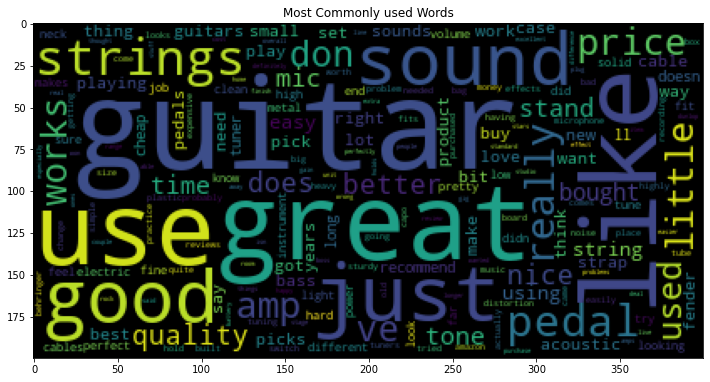

In [61]:
cnv = CountVectorizer(stop_words = 'english')
wrds = cnv.fit_transform(df["reviewText"])
sum_wrds = wrds.sum(axis = 0)

wrds_freq = [(wrd, sum_wrds[0, idx]) for wrd, idx in cnv.vocabulary_.items()]
wrds_freq = sorted(wrds_freq, key = lambda x : x[1], reverse = True)
freq = pd.DataFrame(wrds_freq, columns = ['word', 'frequency'])

wrdcloud = WordCloud().generate_from_frequencies(dict(wrds_freq))

plt.figure(figsize = (12,8))
plt.title("Most Commonly used Words")
plt.imshow(wrdcloud)
plt.show()

In [62]:
# separating all records into a differnet variable to generate wordcloud based on category
neu = df[df["sentiment"] == "neutral"]["reviewText"]
neg = df[df["sentiment"] == "negative"]["reviewText"]
pos = df[df["sentiment"] == "positive"]["reviewText"]
exneg = df[df["sentiment"] == "extreme_negative"]["reviewText"]
expos = df[df["sentiment"] == "extreme_positive"]["reviewText"]

In [63]:
df.head(5)

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,category,description,title,brand,rank,similar_item,price,imageURL,sentiment,reviewyear
0,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",so good that i bought another one love the hea...,5.0,The Best Cable,2012-12-21,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive,2012
1,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",so good that i bought another one love the hea...,5.0,The Best Cable,2012-12-21,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive,2012
2,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]",i have used monster cables for years and with ...,5.0,Monster Standard 100 - 21' Instrument Cable,2014-01-19,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive,2014
3,A1UPZM995ZAH90,B00004Y2UT,"[0, 0]",i have used monster cables for years and with ...,5.0,Monster Standard 100 - 21' Instrument Cable,2014-01-19,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive,2014
4,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",i now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,2012-11-16,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],neutral,2012


In [64]:
df.to_csv("meta_musical.csv")

In [65]:
stpwrds = set(STOPWORDS)
def word_cloud(data, title):
    wordcld = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stpwrds,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.25)
    plt.imshow(wordcld)
plt.show()

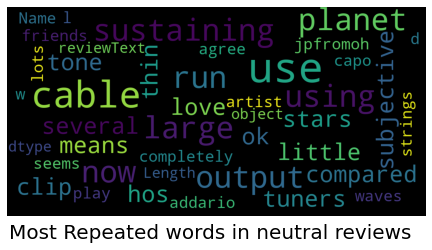

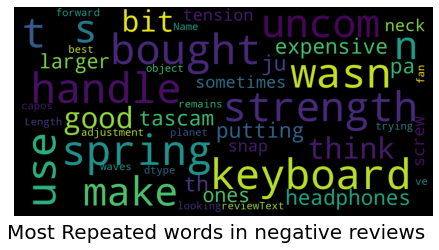

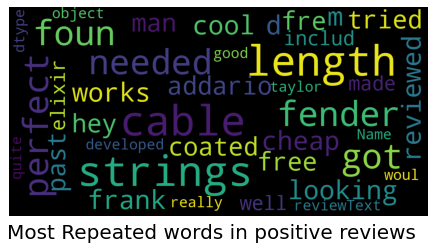

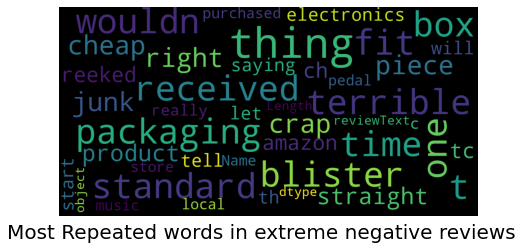

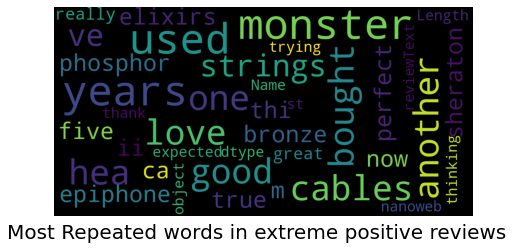

In [66]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(exneg, "Most Repeated words in extreme negative reviews")
word_cloud(expos, "Most Repeated words in extreme positive reviews")

In [67]:
df["target"] = df["sentiment"]
df["target"] = df["target"].replace({"extreme_negative":"0","negative":"0","neutral":"0","positive":"1","extreme_positive":"1"})
df.head(2)

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,category,description,title,brand,rank,similar_item,price,imageURL,sentiment,reviewyear,target
0,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",so good that i bought another one love the hea...,5.0,The Best Cable,2012-12-21,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive,2012,1
1,A2A039TZMZHH9Y,B00004Y2UT,"[0, 0]",so good that i bought another one love the hea...,5.0,The Best Cable,2012-12-21,"[Musical Instruments, Live Sound & Stage, Stag...",[Monster Standard 100 Instrument Cable is the ...,Monster Standard 100-21' Instrument Cable - St...,Monster,"[>#100,614 in Musical Instruments (See Top 100...",,,[],extreme_positive,2012,1


In [68]:

x_train,x_test,y_train,y_test=train_test_split(df['reviewText'],df['target'],test_size=0.20,random_state=42)

In [69]:
vectorizer=TfidfVectorizer(
    sublinear_tf=True,
    max_df=0.5,
    min_df=1,
    stop_words=stopwords.words("english"),
    use_idf=True
)

In [70]:
x_train=vectorizer.fit_transform(x_train)
print('x_train n_samples:%d,n_features:%d' %x_train.shape)

x_train n_samples:7512,n_features:15049


In [71]:
x_test=vectorizer.transform(x_test)
print('x_test n_samples:%d,n_features:%d' %x_test.shape)

x_test n_samples:1879,n_features:15049


In [72]:
cv=TfidfVectorizer(max_features=2500)
x=cv.fit_transform(df['reviewText'])

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [74]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [75]:
print(pred[:10])
print(y_test[:10])

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
8909    0
967     1
934     1
4659    1
5328    0
5465    1
2836    1
5331    1
9365    1
3210    1
Name: target, dtype: object


In [76]:
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred,average='weighted')
f1=f1_score(y_test,pred,average='weighted')
recall=recall_score(y_test,pred,average='weighted')
print("accuracy=",accuracy)
print('precision=',precision)
print('f1=',f1)
print('recall=',recall)

accuracy= 0.8775944651410325
precision= 0.8926577465843512
f1= 0.825300643310235
recall= 0.8775944651410325


In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [78]:
nb=MultinomialNB().fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [79]:
y_pred[:10]

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1'], dtype='<U1')

In [80]:
y_test[:10]

8909    0
967     1
934     1
4659    1
5328    0
5465    1
2836    1
5331    1
9365    1
3210    1
Name: target, dtype: object

In [81]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [82]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
print("accuracy=",accuracy)
print('precision=',precision)
print('f1=',f1)
print('recall=',recall)

accuracy= 0.8722724853645556
precision= 0.7608592887240588
f1= 0.8127655506040402
recall= 0.8722724853645556


In [83]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier().fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [84]:


y_pred1

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [85]:
y_test

8909    0
967     1
934     1
4659    1
5328    0
       ..
8061    1
8931    1
379     1
5537    0
5279    1
Name: target, Length: 1879, dtype: object

In [86]:
accuracy=accuracy_score(y_test,y_pred1)
precision=precision_score(y_test,y_pred1,average='weighted')
f1=f1_score(y_test,y_pred1,average='weighted')
recall=recall_score(y_test,y_pred1,average='weighted')
print("accuracy=",accuracy)
print('precision=',precision)
print('f1=',f1)
print('recall=',recall)

accuracy= 0.9228312932410857
precision= 0.9273438229065476
f1= 0.9083741575697586
recall= 0.9228312932410857


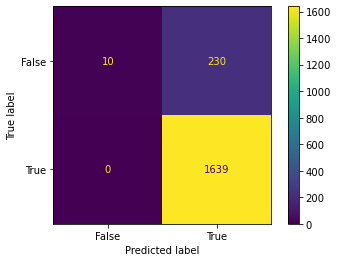

In [87]:
cm=confusion_matrix(y_test,pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()

###### clustering

In [88]:
from sklearn.cluster import KMeans

In [89]:
df33=pd.DataFrame(polarity_list)

In [90]:
df33['overall']=df['rating']

In [91]:
df33

,0,overall
0,0.316667,5.0
1,0.316667,5.0
2,0.333333,5.0
3,0.333333,5.0
4,0.006540,3.0
...,...,...
9386,0.350000,5.0
9387,0.184228,5.0
9388,0.197768,4.0
9389,0.153843,4.0


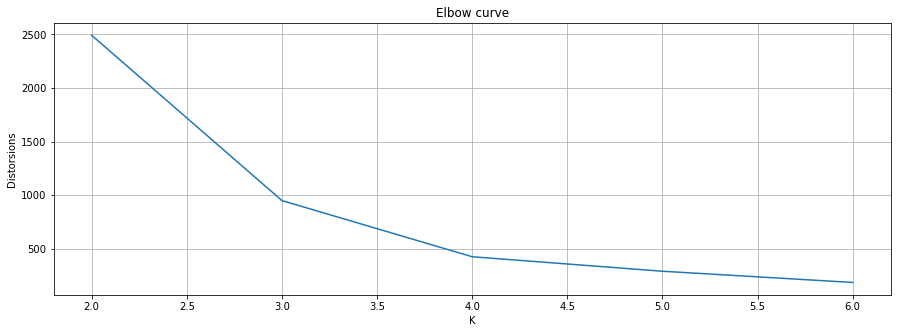

In [92]:
distorsions = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df33)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 7), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.740284065785121
For n_clusters = 3 The average silhouette_score is : 0.7565473299826693
For n_clusters = 4 The average silhouette_score is : 0.7940585790983951
For n_clusters = 5 The average silhouette_score is : 0.6285821966947776
For n_clusters = 6 The average silhouette_score is : 0.640771043257216
For n_clusters = 7 The average silhouette_score is : 0.6071886712933033


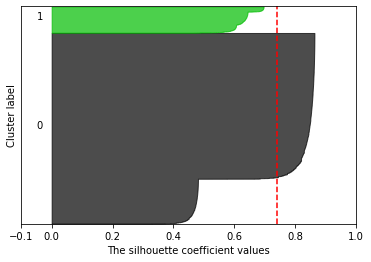

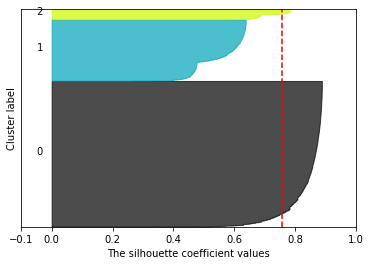

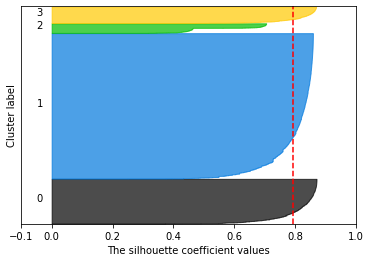

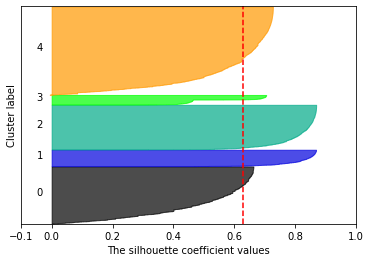

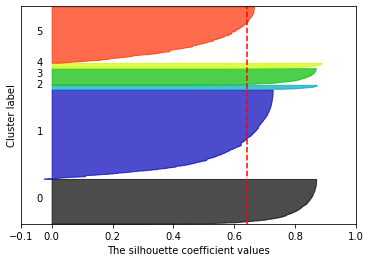

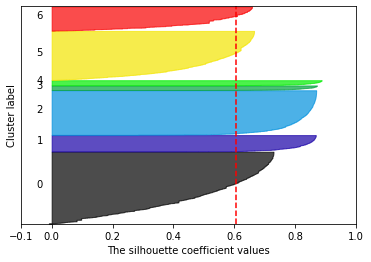

In [93]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df33)

    silhouette_avg = silhouette_score(df33, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df33, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [94]:
Kmeans_model = KMeans(n_clusters=4)
Kmeans_model.fit(df33)

KMeans(n_clusters=4)

In [95]:
cluster_centroid = Kmeans_model.cluster_centers_
cluster_centroid

array([[0.27476143, 5.        ],
       [0.21915037, 4.        ],
       [0.08089918, 1.52392344],
       [0.15734582, 3.        ]])

In [96]:
labels = Kmeans_model.labels_
labels[:10]

array([0, 0, 0, 0, 3, 3, 0, 0, 0, 0])

In [97]:
pred=Kmeans_model.fit_predict(df33)
pred[:10]

array([1, 1, 1, 1, 3, 3, 1, 1, 1, 1])

In [98]:
x=df33.iloc[:,[0,1]].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


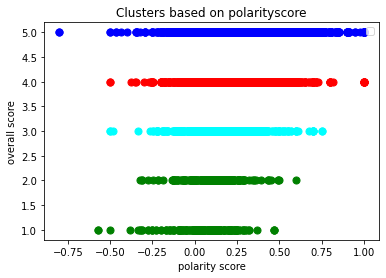

In [99]:
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 50, c = 'red')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 50, c = 'blue')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 50, c = 'green')
plt.scatter(x[pred == 3, 0], x[pred == 3, 1], s = 50, c = 'cyan')
plt.title('Clusters based on polarityscore')
plt.xlabel('polarity score')
plt.ylabel('overall score')
plt.legend()
plt.show()

###### time series analysis

In [100]:
df2=pd.DataFrame(df['rating'])
df2

,rating
0,5.0
1,5.0
2,5.0
3,5.0
4,3.0
...,...
9386,5.0
9387,5.0
9388,4.0
9389,4.0


In [101]:
df2['reviewTime']=df['reviewTime']
df2

,rating,reviewTime
0,5.0,2012-12-21
1,5.0,2012-12-21
2,5.0,2014-01-19
3,5.0,2014-01-19
4,3.0,2012-11-16
...,...,...
9386,5.0,2014-07-20
9387,5.0,2014-07-02
9388,4.0,2014-07-22
9389,4.0,2014-07-01


In [102]:
df2=df2.groupby('reviewTime').sum()
df2

,rating
reviewTime,
2004-09-18,4.0
2004-09-29,10.0
2004-11-29,20.0
2005-03-11,8.0
2005-03-25,10.0
...,...
2014-07-16,4.0
2014-07-19,10.0
2014-07-20,40.0


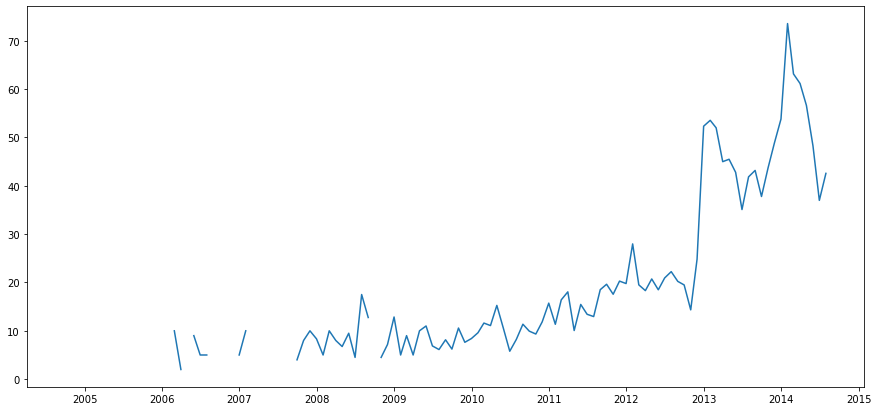

In [103]:
mon_resample=df2.resample('M')
new_df=pd.DataFrame(mon_resample.mean())
plt.figure(figsize=(15,7))

plt.plot(new_df)

In [104]:
len(new_df)

119

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [106]:
#decomp=seasonal_decompose(new_df,period=12)
decomp=seasonal_decompose(df2,period=12)

In [107]:
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

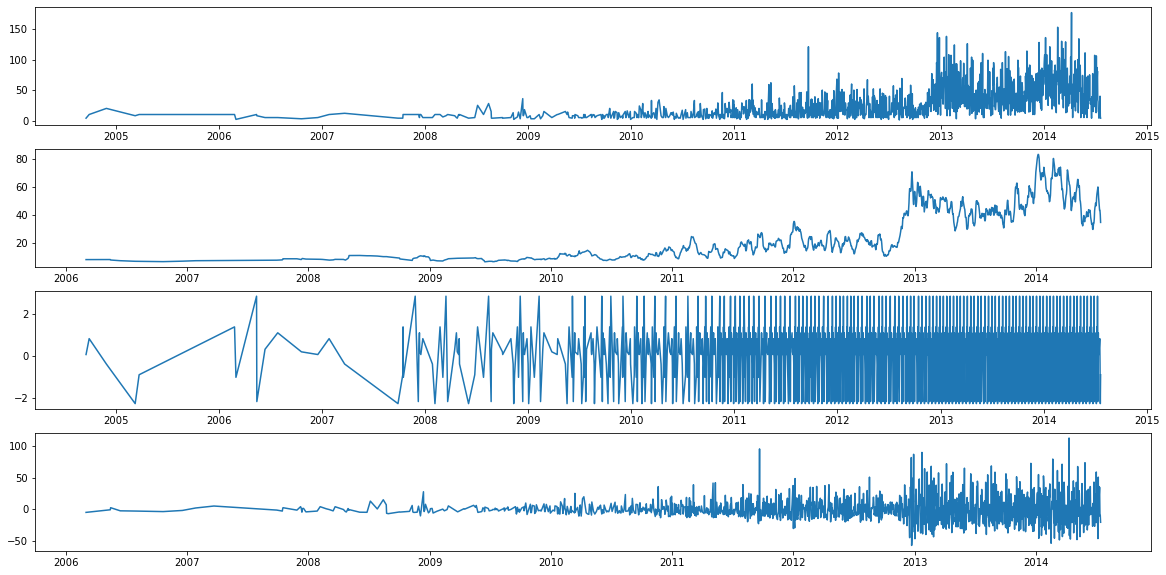

In [108]:
fix,ax=plt.subplots(4,1,figsize=(20,10))
plt.subplot(411)
plt.plot(df2)

plt.subplot(412)
plt.plot(trend)

plt.subplot(413)
plt.plot(seasonal)

plt.subplot(414)
plt.plot(residual)
plt.show()

In [109]:
from statsmodels.tsa.api import ExponentialSmoothing
alpha=0.2;beta=0.5;gamma=0.8

In [110]:
model_tep=ExponentialSmoothing(df2,trend='add',seasonal='add',seasonal_periods=365).fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [111]:
fcast_tep=model_tep.fittedvalues
fcast_tep

reviewTime
2004-09-18     3.989295
2004-09-29    10.774083
2004-11-29    20.627963
2005-03-11     3.716752
2005-03-25     8.732041
                ...    
2014-07-16    10.313966
2014-07-19     9.599886
2014-07-20    24.612403
2014-07-21    37.910758
2014-07-22    28.883308
Length: 1433, dtype: float64

Text(0.5, 1.0, 'triple Exponent Smoothing')

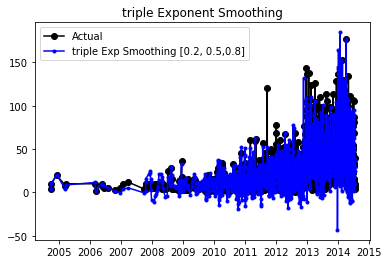

In [112]:
plt.plot(df2,marker='o',color='black',label='Actual')
plt.plot(fcast_tep, marker='.',color='blue',label='triple Exp Smoothing [0.2, 0.5,0.8]')
plt.legend()
plt.title('triple Exponent Smoothing')

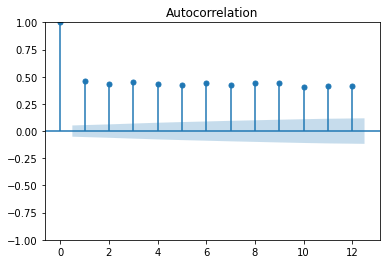

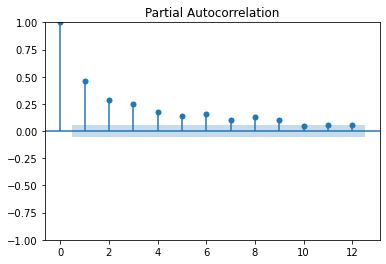

In [113]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df2,lags=12)
plot_pacf(df2,lags=12)
plt.show()

In [114]:
p=9;q=12;d=1

In [115]:
train_len=int(0.7*len(df2))
train=df2.iloc[:train_len]
test=df2.iloc[train_len:]

In [116]:
print(len(train))
print(len(test))

1003
430


In [117]:
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(train,order=(p,1,q)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [118]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 rating   No. Observations:                 1003
Model:                ARIMA(9, 1, 12)   Log Likelihood               -4211.592
Date:                Fri, 07 Apr 2023   AIC                           8467.184
Time:                        12:35:49   BIC                           8575.198
Sample:                             0   HQIC                          8508.233
                               - 1003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7957      0.313     -2.540      0.011      -1.410      -0.182
ar.L2         -0.7394      0.225     -3.288      0.001      -1.180      -0.299
ar.L3         -0.9462      0.269     -3.511      0.000      -1.474      -0.418
ar.L4         -1.2446      0.273     -4.554      0.000      -1.780      -0.709
ar.L5         -0.9309      0.370     -2.518      0.012      -1.656      -0.206
ar.L6         -0.9009      0.277     -3.258      0.001      -1.443      -0.359
ar.L7         -0.6313      0.246     -2.569      0.010      -1.113      -0.150
ar.L8         -0.8145      0.185     -4.400      0.000      -1.177      -0.452
ar.L9         -0.1771      0.288     -0.615      0.539      -0.741       0.387
ma.L1         -0.1562      0.312     -0.501      0.616      -0.767       0.455
ma.L2         -0.0181      0.153     -0.118      0.906      -0.319       0.282
ma.L3          0.2464      0.132      1.872      0.061      -0.012       0.504
ma.L4          0.3099      0.122      2.550      0.011       0.072       0.548
ma.L5         -0.2633      0.154     -1.713      0.087      -0.564       0.038
ma.L6          0.0371      0.131      0.283      0.777      -0.220       0.294
ma.L7         -0.1988      0.122     -1.628      0.104      -0.438       0.041
ma.L8          0.2861      0.129      2.216      0.027       0.033       0.539
ma.L9         -0.5338      0.174     -3.069      0.002      -0.875      -0.193
ma.L10        -0.1796      0.258     -0.697      0.486      -0.685       0.325
ma.L11        -0.0098      0.031     -0.312      0.755      -0.072       0.052
ma.L12         0.0950      0.029      3.261      0.001       0.038       0.152
sigma2       261.2395      7.290     35.833      0.000     246.950     275.529
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1480.23
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.00   Skew:                             1.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
p=np.arange(9)
q=np.arange(12)
li=[]
for p in range(10):
    for q in range(13):
        li.append((p,1,q))

In [120]:
model=[]

for i in li:
    m=ARIMA(train,order=i).fit()
    model.append(m)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
from sklearn.metrics import mean_squared_error

In [123]:
aic=[]
bic=[]
mse=[]
rmse=[]
for i in model:
    aic.append(i.aic)
    bic.append(i.bic)
    a=mean_squared_error(train,i.fittedvalues)
    b=mean_squared_error(train,i.fittedvalues,squared=False)
    mse.append(a)
    rmse.append(b)

In [124]:
print(min(aic))
print(min(bic))
print(min(mse))
print(min(rmse))

8463.333841200973
8485.439115453595
260.4393276706935
16.138132719453434


In [125]:
print(rmse.index(min(rmse)))

116


In [126]:
print(li[116])

(8, 1, 12)


In [127]:
p=8;q=12

In [128]:
model_arma=ARIMA(train,order=(p,1,q)).fit()

In [129]:
fcast_arma=model_arma.fittedvalues
fcast_arma

reviewTime
2004-09-18     0.000000
2004-09-29     3.998945
2004-11-29     6.997595
2005-03-11    11.468179
2005-03-25    10.904308
                ...    
2013-05-07    40.762209
2013-05-08    30.305145
2013-05-09    46.571640
2013-05-10    30.633217
2013-05-11    33.351448
Length: 1003, dtype: float64

In [130]:

model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 rating   No. Observations:                 1003
Model:                ARIMA(8, 1, 12)   Log Likelihood               -4210.667
Date:                Fri, 07 Apr 2023   AIC                           8463.334
Time:                        12:40:32   BIC                           8566.439
Sample:                             0   HQIC                          8502.517
                               - 1003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6588      0.070     -9.372      0.000      -0.797      -0.521
ar.L2         -0.6447      0.074     -8.730      0.000      -0.789      -0.500
ar.L3         -0.7628      0.073    -10.483      0.000      -0.905      -0.620
ar.L4         -1.1676      0.077    -15.228      0.000      -1.318      -1.017
ar.L5         -0.7933      0.066    -12.079      0.000      -0.922      -0.665
ar.L6         -0.6845      0.061    -11.193      0.000      -0.804      -0.565
ar.L7         -0.4908      0.075     -6.510      0.000      -0.639      -0.343
ar.L8         -0.7863      0.063    -12.566      0.000      -0.909      -0.664
ma.L1         -0.2895      0.074     -3.905      0.000      -0.435      -0.144
ma.L2          0.0186      0.082      0.227      0.820      -0.142       0.179
ma.L3          0.1544      0.067      2.303      0.021       0.023       0.286
ma.L4          0.4011      0.083      4.814      0.000       0.238       0.564
ma.L5         -0.3255      0.073     -4.469      0.000      -0.468      -0.183
ma.L6         -0.0518      0.079     -0.655      0.513      -0.207       0.103
ma.L7         -0.1205      0.084     -1.442      0.149      -0.284       0.043
ma.L8          0.3812      0.074      5.181      0.000       0.237       0.525
ma.L9         -0.7037      0.062    -11.423      0.000      -0.824      -0.583
ma.L10        -0.0055      0.031     -0.177      0.859      -0.066       0.055
ma.L11        -0.0041      0.032     -0.128      0.898      -0.068       0.060
ma.L12         0.0820      0.030      2.718      0.007       0.023       0.141
sigma2       263.1924      7.473     35.221      0.000     248.546     277.838
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1424.13
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               8.05   Skew:                             1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
predictions=model_arma.predict(start=len(train),end=len(train)+len(test)-1)

In [132]:
predictions

1003    34.296070
1004    31.864520
1005    43.700429
1006    32.918218
1007    39.522564
          ...    
1428    35.021132
1429    34.104258
1430    35.242644
1431    34.095943
1432    35.029508
Name: predicted_mean, Length: 430, dtype: float64

In [133]:
fcast=model_arma.predict(start=len(df2),end=len(df2)+10)
print(fcast)

1433    34.474287
1434    34.547787
1435    34.965269
1436    34.146364
1437    35.215475
1438    34.103990
1439    35.049275
1440    34.440823
1441    34.595999
1442    34.912607
1443    34.187889
Name: predicted_mean, dtype: float64


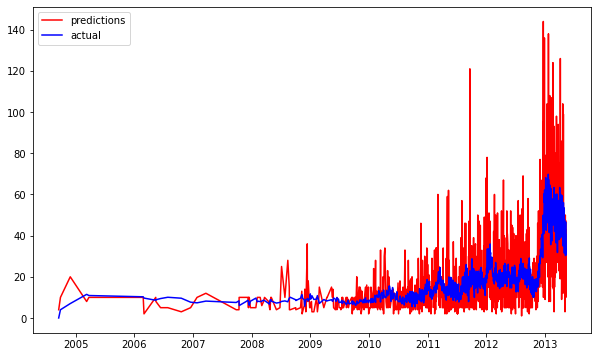

In [134]:
plt.figure(figsize=(10,6))
plt.plot(train,'r',label='predictions')
plt.plot(fcast_arma,'b',label='actual')
plt.legend()